# Polynomial Regression

Here we shall discuss how polynomial regression does better job in identifying true relationship among variables.

## Data

The data is a sample of height, weight, age and gender of peoples of Kung-San tribe in the Kalahari desert of Africa. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./height_weight_kung_san_people.csv", sep=',')

In [3]:
data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [4]:
data.shape

(544, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


We shall try to find a relationship between the weight and height of Kung San people using this data.

Here *weight* is our target variable.

## Plotting

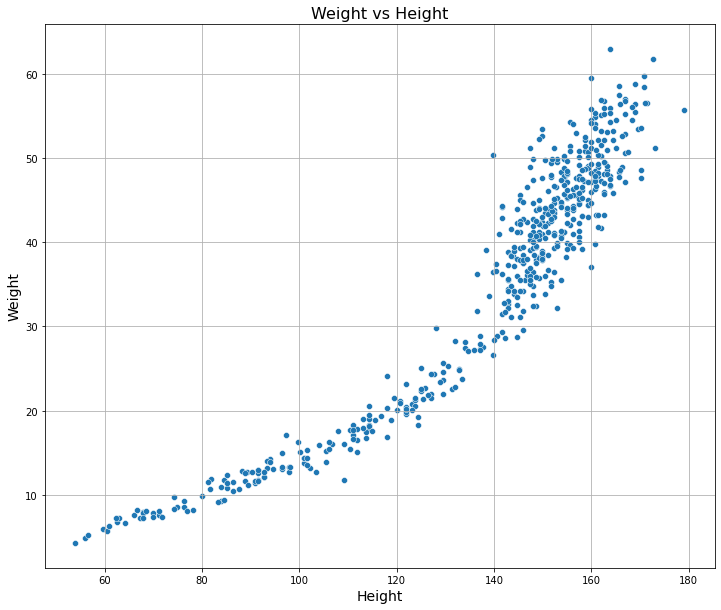

In [6]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=data, x='height', y='weight')
plt.grid()
#plt.legend()
plt.title("Weight vs Height", fontsize=16)
plt.xlabel("Height", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.show()

## Polynomial Regression of order 1 (i.e. simple linear regression)

i.e. we are trying fit the equation:

$$ y = \hat{\theta}_0 + \hat{\theta}_1 x $$

Where $x$ is *height* and $y$ is *weight*

In [7]:
from sklearn.linear_model import LinearRegression

### Fit the model

In [8]:
first_order_model = LinearRegression()

In [9]:
first_order_model.fit(X=data['height'].values.reshape(-1,1), y=data['weight'].values)

LinearRegression()

### Model parameters

In [10]:
first_order_model.intercept_

-33.75613690832983

In [11]:
first_order_model.coef_

array([0.50169934])

The model looks like:

$$ \hat{weight} = -33.756 + 0.502 \times height$$

### The model output

In [12]:
x_min = data['height'].min()
x_max = data['height'].max()
x_values = np.linspace(x_min, x_max, 100)
y_values_first_order = first_order_model.predict(x_values.reshape(-1,1))

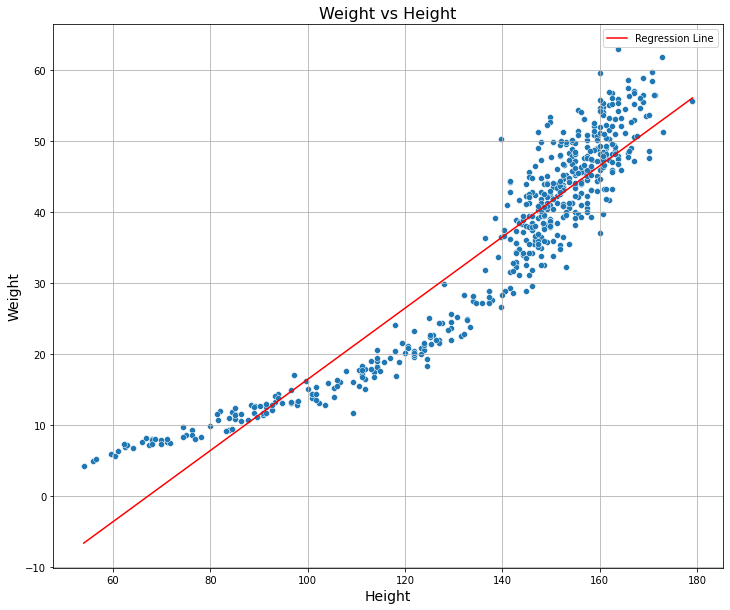

In [13]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=data, x='height', y='weight')
plt.plot(x_values, y_values_first_order, color='r', label='Regression Line')
plt.legend()
plt.grid()
plt.title("Weight vs Height", fontsize=16)
plt.xlabel("Height", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.show()

As we can see from the above graph that the "first order regression line" doesn't fit well to the data.
We can use higher order polynomials to describe the relationship.

### Calculate coefficient of determination

In [14]:
from sklearn.metrics import r2_score

In [15]:
y_p_1 = first_order_model.predict(data['height'].values.reshape(-1,1))

In [38]:
r2_1 = r2_score(y_true=data['weight'].values, y_pred=y_p_1)

print(f"Coefficient of determination for first order polynomial: {r2_1}")

Coefficient of determination for first order polynomial: 0.8851464200503394


### Calculate adjusted R-squared

In [66]:
def adjusted_R_squared(m, k, r2):
    return (1 - ((m-1)*(1-r2)/(m-k-1)))

In [67]:
m = len(data)
k = 1

In [68]:
adjusted_R_squared(m, k, r2_1)

0.8849345130762625

## Second order Polynomial Regression


i.e. we are trying fit the equation:

$$ y = \hat{\theta}_0 + \hat{\theta}_1 x + \hat{\theta}_2 x^2 $$

Where $x$ is *height* and $y$ is *weight*.

So, in order to achieve that:

- $x_1 = x$

- $x_2 = x^2$

Then the equation becomes

$$ y = \hat{\theta}_0 + \hat{\theta}_1 x_1 + \hat{\theta}_2 x_2 $$

Which can now be solved using Multiple Linear Regression

### Prepare the data

In [17]:
x1 = data['height'].values
x2 = np.square(x1)

$$ X = [x1, x2] $$

In [18]:
X = np.hstack((x1.reshape(-1,1), x2.reshape(-1,1)))

In [19]:
pd.DataFrame(X, columns=['height', 'height_square'])

,height,height_square
0,151.765,23032.615225
1,139.700,19516.090000
2,136.525,18639.075625
3,156.845,24600.354025
4,145.415,21145.522225
...,...,...
539,145.415,21145.522225
540,162.560,26425.753600
541,156.210,24401.564100
542,71.120,5058.054400


### Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X=X)

StandardScaler()

In [23]:
X_std = scaler.transform(X)

In [24]:
X_std[:,0].min() , X_std[:,0].max()

(-3.05647439422663, 1.4797224464253014)

In [25]:
X_std[:,1].min() , X_std[:,1].max()

(-2.5288189559873486, 1.8169717368547482)

### fit the model

In [26]:
second_order_model = LinearRegression()

In [27]:
second_order_model.fit(X_std, y=data['weight'].values)

LinearRegression()

### Model parameters

In [28]:
second_order_model.intercept_

35.610617592463214

In [29]:
second_order_model.coef_

array([-13.04264336,  27.05203396])

The model looks like:

$$\hat{weight} = 35.611 + (-13.043) \times height\_std + (27.052) \times height^{2}\_std$$

### Model output

In [30]:
x_min = data['height'].min()
x_max = data['height'].max()
in_between_values = np.linspace(x_min, x_max, 100)

In [31]:
x_values = np.hstack((in_between_values.reshape(-1,1), np.square(in_between_values).reshape(-1,1)))

In [32]:
x_values_std = scaler.transform(x_values)

In [33]:
y_values_second_order = second_order_model.predict(x_values_std)

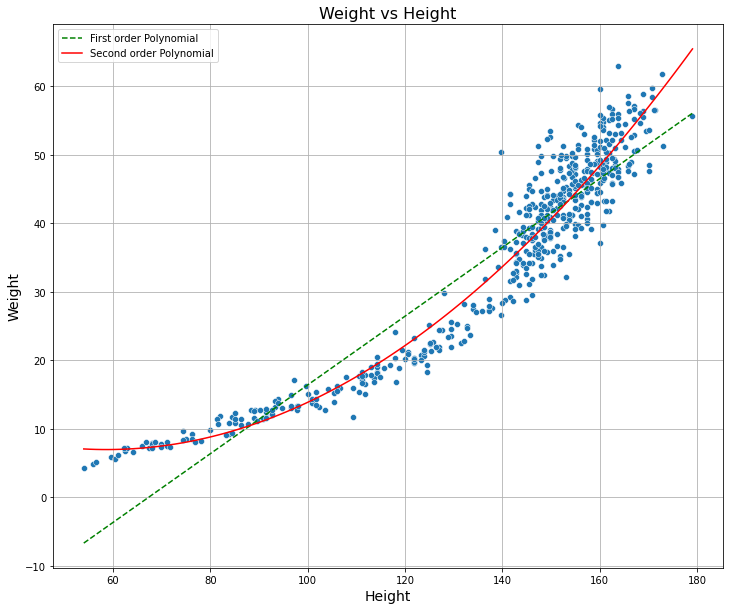

In [34]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=data, x='height', y='weight')
plt.plot(in_between_values, y_values_first_order, 'g--', label='First order Polynomial')
plt.plot(in_between_values, y_values_second_order, color='r', label='Second order Polynomial')
plt.legend()
plt.grid()
plt.title("Weight vs Height", fontsize=16)
plt.xlabel("Height", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.show()

### Calculate coefficient of determination

In [36]:
y_p_2 = second_order_model.predict(X_std)

In [39]:
r2_2 = r2_score(y_true=data['weight'].values, y_pred=y_p_2)

print(f"Coefficient of determination for second order polynomial: {r2_2}")

Coefficient of determination for second order polynomial: 0.9285373880898893


In [70]:
adjusted_R_squared(m, k=2, r2=r2_2)

0.9282732009848611

## Third order polynomial

i.e. we are trying fit the equation:

$$ y = \hat{\theta}_0 + \hat{\theta}_1 x + \hat{\theta}_2 x^2 + \hat{\theta}_3 x^3 $$

Where $x$ is *height* and $y$ is *weight*.

So, in order to achieve that:

- $x_1 = x$

- $x_2 = x^2$

- $x_3 = x^3$

Then the equation becomes

$$ y = \hat{\theta}_0 + \hat{\theta}_1 x_1 + \hat{\theta}_2 x_2 + \hat{\theta}_3 x_3 $$

Which can now be solved using Multiple Linear Regression

### Prepare the data

In [40]:
x1 = data['height'].values
x2 = np.square(x1)
x3 = np.power(x1, 3)

$$X = [x1, x2, x3] $$

In [41]:
X = np.hstack((x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)))

In [42]:
pd.DataFrame(X, columns=['height', 'height_square', 'height_cube'])

,height,height_square,height_cube
0,151.765,23032.615225,3.495545e+06
1,139.700,19516.090000,2.726398e+06
2,136.525,18639.075625,2.544700e+06
3,156.845,24600.354025,3.858443e+06
4,145.415,21145.522225,3.074876e+06
...,...,...,...
539,145.415,21145.522225,3.074876e+06
540,162.560,26425.753600,4.295771e+06
541,156.210,24401.564100,3.811768e+06
542,71.120,5058.054400,3.597288e+05


### Standardization

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X)

StandardScaler()

In [45]:
X_std = scaler.transform(X)

In [46]:
pd.DataFrame(X_std, columns=['height', 'height_square_std', 'height_cube_std'])

,height,height_square_std,height_cube_std
0,0.489588,0.470359,0.437671
1,0.052087,-0.053848,-0.159800
2,-0.063045,-0.184584,-0.300942
3,0.673799,0.704061,0.719568
4,0.259324,0.189051,0.110897
...,...,...,...
539,0.259324,0.189051,0.110897
540,0.881037,0.976173,1.059283
541,0.650773,0.674428,0.683312
542,-2.434762,-2.209101,-1.998219


### fit the model

In [47]:
third_order_model = LinearRegression()

In [48]:
third_order_model.fit(X_std, y = data['weight'].values)

LinearRegression()

### Model parameters

In [49]:
third_order_model.intercept_

35.61061759246321

In [50]:
third_order_model.coef_

array([-25.68210297,  54.17561278, -14.63828595])

So the model looks like:

$$\hat{weight} = 35.61 + (-25.68) \times height_{std} + (54.18) \times height^2_{std} + (-14.64) \times height^3_{std}$$

### Model output

In [51]:
x_min = data['height'].min()
x_max = data['height'].max()
in_between_values = np.linspace(x_min, x_max, 100)

In [52]:
square_values = np.square(in_between_values)
cube_values = np.power(in_between_values, 3)

In [53]:
x_values = np.hstack((in_between_values.reshape(-1,1), square_values.reshape(-1,1), cube_values.reshape(-1,1)))

In [54]:
x_values_std = scaler.transform(x_values)

In [55]:
y_values_third_order = third_order_model.predict(x_values_std)

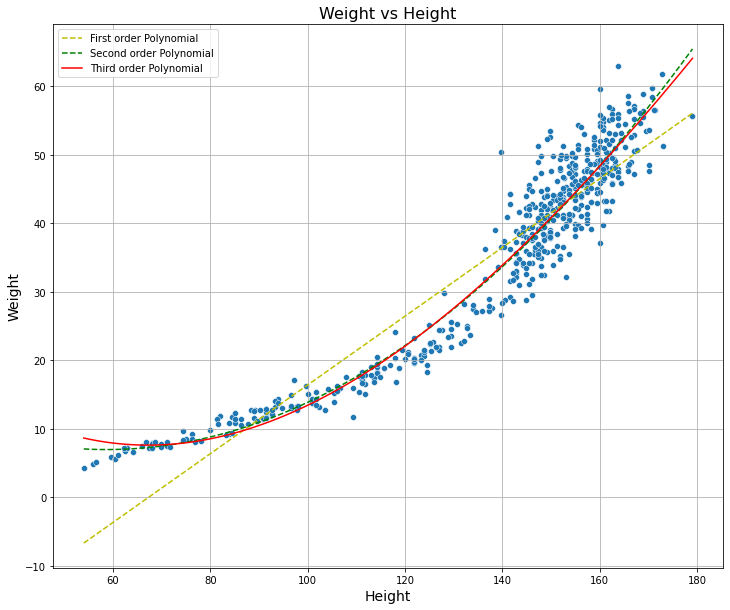

In [56]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=data, x='height', y='weight')
plt.plot(in_between_values, y_values_first_order, 'y--', label='First order Polynomial')
plt.plot(in_between_values, y_values_second_order, 'g--', label='Second order Polynomial')
plt.plot(in_between_values, y_values_third_order, color='r', label='Third order Polynomial')
plt.legend()
plt.grid()
plt.title("Weight vs Height", fontsize=16)
plt.xlabel("Height", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.show()

### Calculate coefficient of determination

In [57]:
y_p_3 = third_order_model.predict(X_std)

In [58]:
r2_3 = r2_score(y_true=data['weight'].values, y_pred=y_p_3)

print(f"Coefficient of determination for second order polynomial: {r2_3}")

Coefficient of determination for second order polynomial: 0.9289058038853012


In [71]:
adjusted_R_squared(m, k=3, r2=r2_3)

0.9285108361291085

## Observations

- The first order polynomial doesn't decribe the data well.

- The second order polynomial does a good job in describing the data.

- The third order polynomial is as good as second order polynomial in terms of fiiting the data. 

So we shall restrict ourselves to second order polynomial for this particular dataset.